In [1]:
using CSV
using DataFrames
using Interact
using Plots
using Dates

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12950832504765555155\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1240735986074163717\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12950832504765555155\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
download(url, "covid19_data.csv")

"covid19_data.csv"

## Exercise 1: Visualizing the data over time

In [3]:
data = CSV.read("covid19_data.csv", DataFrame); 
rename!(data, 1=>"province", 2=>"country");

all_countries = collect(data[:, 2]);


In [4]:
# check country name
#data[[startswith(country, "India") for country in all_countries], :]


In [5]:
countries = Vector(["China", "Japan", "Korea, South", "US", "United Kingdom", "France", "Germany", "India"]);


In [6]:
date_strings = names(data[:, 5:end]);
format = Dates.DateFormat("m/d/Y")
dates = parse.(Date, date_strings, format) .+ Year(2000);

num_days = length(date_strings);


In [7]:
final_data = Dict()

for country in countries
    data_rows = data[(all_countries .== country), 5:end];
    country_data = Vector([sum(data_rows[!, i]) for i in 1 : size(data_rows,2)])
    country_data = convert(Array{Float64,1}, country_data)
    replace!(country_data, 0=>NaN)
    final_data[country] = country_data
end

#final_data

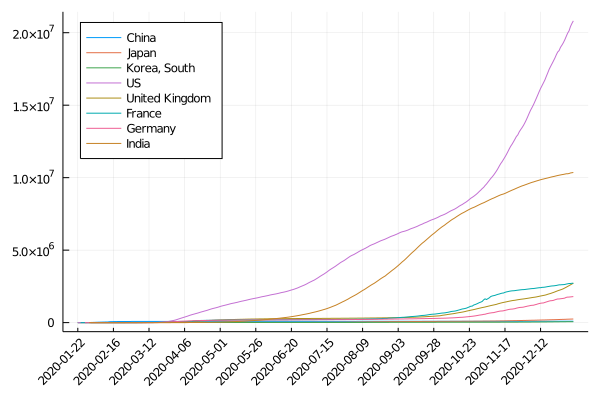

In [8]:
p = plot(fmt = :png)

for country in countries
    data = final_data[country]
    plot!(dates, data, xticks=dates[1:25:end], xrotation=45, leg=:topleft, label=country)
end

p

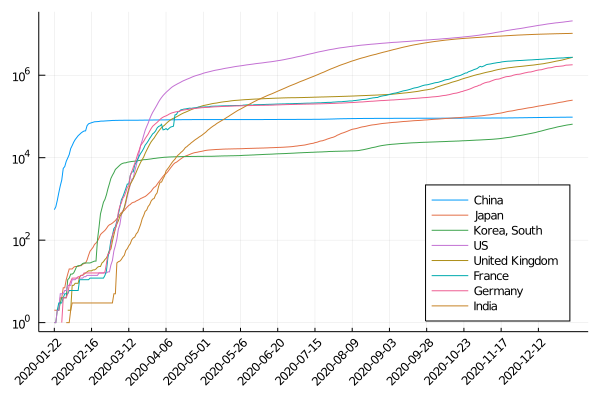

In [9]:
p = plot(fmt = :png)

for country in countries
    data = final_data[country]
    plot!(dates, data, xticks=dates[1:25:end], xrotation=45, leg=:bottomright, label=country, yscale=:log10)
end

p

In [10]:
function plot_covid_cases_upto_date(final_data, countries, date_index, log_scale=false)

    for country in countries
        country_data = final_data[country]
        country_data_upto_date = country_data[1: date_index]
        
        if log_scale == false
            plot!(country_data_upto_date,
                  leg=:outertopright, label=country, m=:o, xlim=(0, num_days)
                 )
        else
            plot!(country_data_upto_date, 
                  leg=:outertopright, label=country, m=:o, xlim=(0, num_days), yscale=:log10
                 )
        end
    end
end

plot_covid_cases_upto_date (generic function with 2 methods)

In [11]:
plotly()
Plots.theme(:wong2)

@manipulate for i in slider(1:num_days,value=1)
    p = plot( fmt = :png, size = (850, 500) )
    plot_covid_cases_upto_date(final_data, countries, i, true)
    xlabel!("Day number")
    ylabel!("Cumulative number of confirmed cases")
    title!("Covid19 Time Series")
    p
end


┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /Users/jeenuthomas/.julia/packages/Plots/vsE7b/src/backends.jl:372


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 349,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011cb6c010, Task (runnable) @0x000000011cb6c010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\"

## Exercise 2: Visualizing changes (https://aatishb.com/covidtrends/)

In [12]:
#all_cases_data = data[:, 5:end];
#total_cases_to_date = Vector([sum(all_cases_data[!, i]) for i in 1 : size(all_cases_data,2)])

In [13]:
total_cases_to_date = final_data
new_cases = Dict()

for country in countries
    country_data = final_data[country]
    country_new_cases = []
    for i in 1:length(country_data)
        if i > 7
            cases_last_week = country_data[i] - country_data[i-7]
        else
            cases_last_week = country_data[i]
        end
        
        push!(country_new_cases, cases_last_week)
    end
    
    country_new_cases = convert(Array{Float64,1}, country_new_cases)
        
    replace!(country_new_cases, 0=>NaN)
    
    new_cases[country] = country_new_cases 
end


In [14]:
#total_cases_to_date

In [15]:
#new_cases

In [16]:
function plot_total_vs_new_cases(total_cases_to_date, new_cases, countries, date_index, log_scale=false)
    
    colors = [:black, :orange, :red, :green, :purple, :pink, :brown, :blue]
    count = 1
    for country in countries
        total_country_data = total_cases_to_date[country]
        total_country_data_upto_date = total_country_data[1: date_index]
        
        new_country_data = new_cases[country]
        new_country_data_upto_date = new_country_data[1: date_index]
        

        if log_scale == false
            plot!(total_country_data_upto_date, new_country_data_upto_date, color=colors[count],
              leg=:outertopright, label=country, xlim=(0, 20000000), ylim=(0, 1540000)
              )
            scatter!([total_country_data_upto_date[end]], [new_country_data_upto_date[end]], label="", color=colors[count])
            annotate!(total_country_data_upto_date[end], new_country_data_upto_date[end], text(country, 10, colors[count]))
        else
            plot!(total_country_data_upto_date, 
                  new_country_data_upto_date,
                  leg=:topleft, 
                  label=country, 
                  yscale=:log10)
        end  
        count = count + 1
    end
end

plot_total_vs_new_cases (generic function with 2 methods)

In [17]:
plotly()
Plots.theme(:wong2)

@manipulate for date_index in slider(1:num_days, value=1)
    
    p = plot( fmt = :png, size = (850, 500))
    
    plot_total_vs_new_cases(total_cases_to_date, new_cases, countries, date_index)
    
    xlabel!("Total confirmed cases ")
    ylabel!("New confirmed cases in the past week")
    title!("Covid19 Cases Trajectory")
    p
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 349,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/jeenuthomas/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/jeenuthomas/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011cb52410, Task (runnable) @0x000000011cb52410), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\"